In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
data= pd.read_csv("/content/Placement_Data_Full_Class.csv")

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
data = data.drop(columns=["sl_no", "salary"])

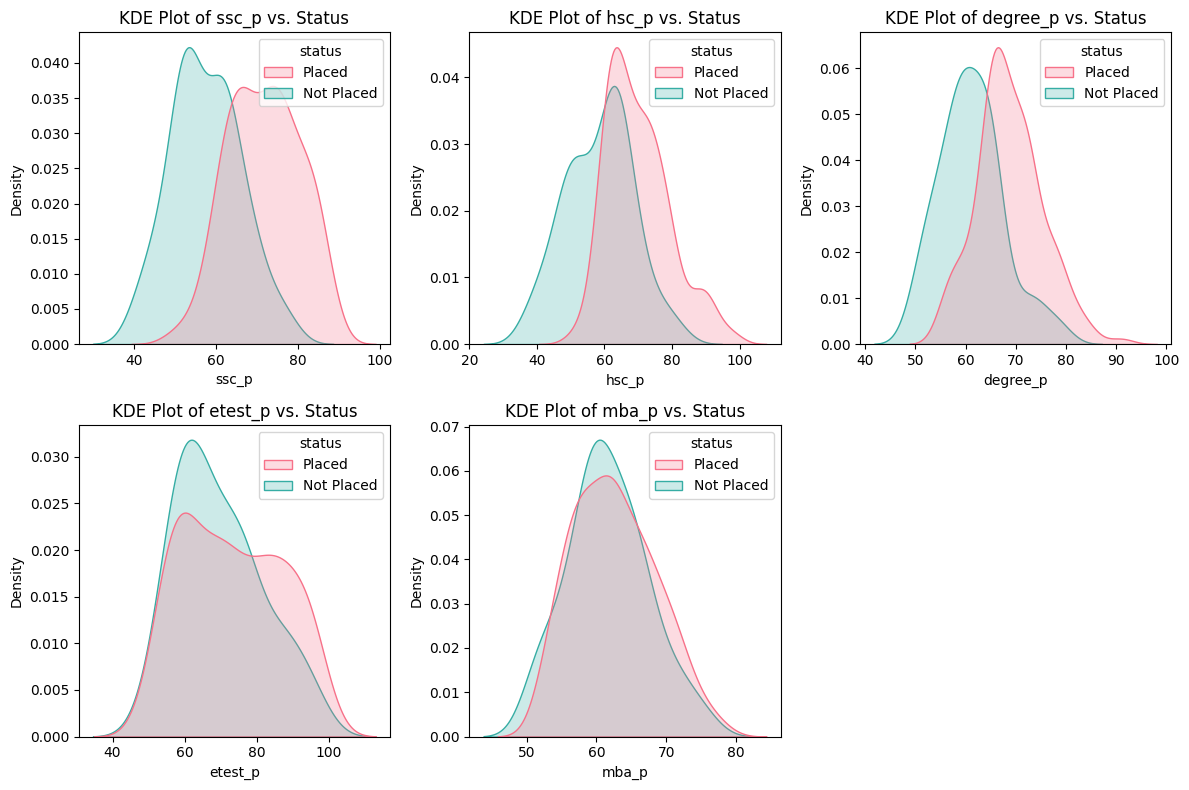

In [ ]:
import seaborn as sns
# Assuming 'status' is the target variable
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Create KDE plots for numerical features vs. 'status'
plt.figure(figsize=(12, 8))

for feature in numerical_features:
    plt.subplot(2, 3, numerical_features.index(feature) + 1)
    sns.kdeplot(data=data, x=feature, hue='status', fill=True, common_norm=False, palette='husl')
    plt.title(f'KDE Plot of {feature} vs. Status')

plt.tight_layout()
plt.show()

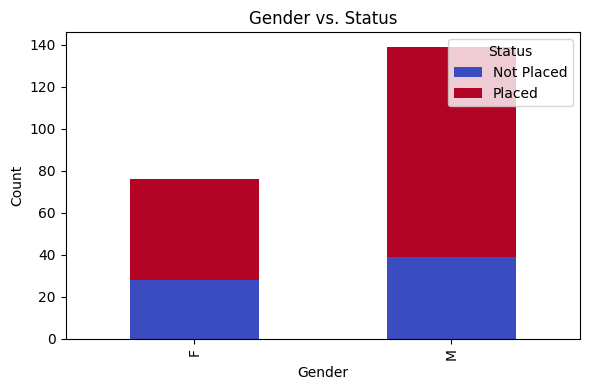

In [ ]:
# Create a crosstab to count the number of each 'status' category for each 'gender'
ct = pd.crosstab(data['gender'], data['status'])

# Plot the bar chart
ct.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(6, 4))

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Status')

# Show the plot
plt.legend(title='Status', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:

# Create a crosstab to count the number of each 'status' category for each 'gender'
ct = pd.crosstab(data['gender'], data['status'], margins=True, margins_name='Total')

# Calculate the placement rate for each gender category
placement_rates = (ct['Placed'] / ct['Total']) * 100

# Display the placement rates in a tabular format
placement_rates_df = pd.DataFrame({'Not Placed': ct['Not Placed'], 'Placed': ct['Placed'], 'Total': ct['Total'], 'Placement Rate (%)': placement_rates})
print(placement_rates_df)

        Not Placed  Placed  Total  Placement Rate (%)
gender                                               
F               28      48     76           63.157895
M               39     100    139           71.942446
Total           67     148    215           68.837209


Sadly, there appears to be a gender imbalance between female and male students. Males dominate the scheme with double the numbers compared to their female classmates. Their success rate also higher with 72% of male students securing a place compared to 58% of female students. Subsequently, it is recommended that the university targets more females to join the scheme.

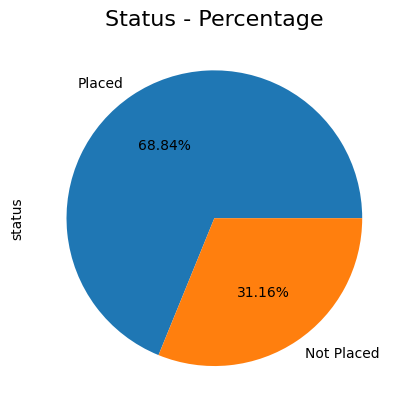

In [ ]:
plt.subplot(1,1,1)
data['status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Status - Percentage", fontsize=16)
plt.show()

In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['status'])  # Features
y = data['status']  # Target variable


In [ ]:

# Encode the target variable 'status' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)



In [ ]:
# Perform one-hot encoding for categorical features
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearnex import patch_sklearn
patch_sklearn()

# Initialize the classifiers
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# Train and evaluate each classifier
results = []
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

    print(f'{name} Accuracy: {accuracy:.2f}')

Decision Tree Accuracy: 0.84
Random Forest Accuracy: 0.77
K-Nearest Neighbors Accuracy: 0.79
Naive Bayes Accuracy: 0.74


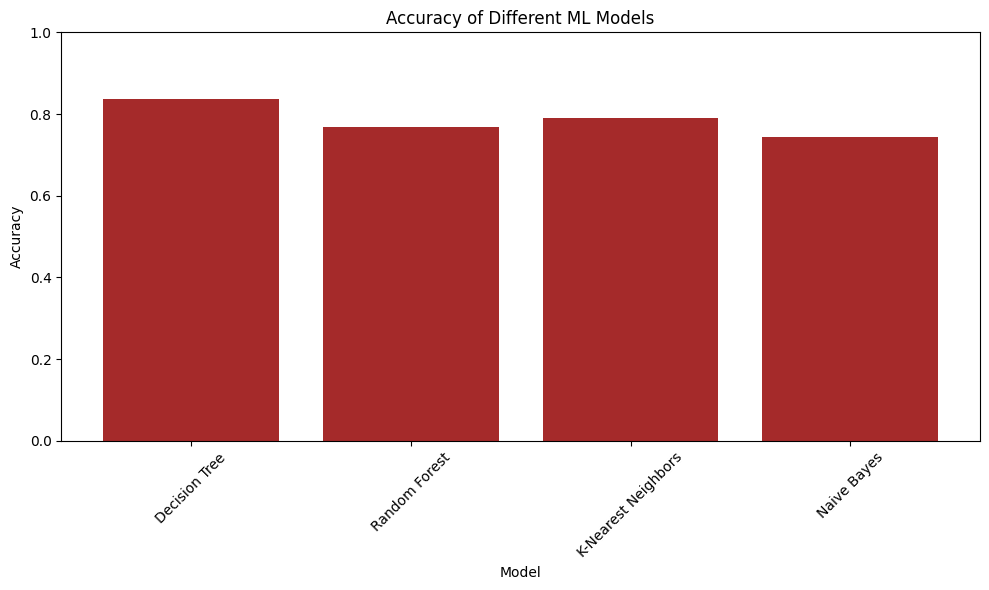

In [ ]:
# Create a bar plot to compare the accuracy of different models
model_names, accuracies = zip(*results)
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='brown')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()